# **Import Libraries**

In [37]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import random # to generate random values

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Data**

In [39]:
df = pd.read_csv("dataset_diabetes/diabetic_data.csv")

In [40]:
df.shape

(101766, 50)

In [41]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

# Attribute Description 

Encounter ID: Unique identifier of an encounter

Patient number: Unique identifier of a patient

Race Values: Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight: Weight in Kg

Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital: Integer number of days between admission and discharge

Payer code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures: Number of lab tests performed during the encounter

Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications: Number of distinct generic names administered during the encounter

Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses : Number of diagnoses entered to the system 0%

Glucose serum test : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

Diabetes medications : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

Readmitted: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

# Imputed Weight

In [42]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


In [43]:
race_counts = df['race'].value_counts()
print(race_counts)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [44]:
weight_counts = df['weight'].value_counts()
print(weight_counts)


# 1. The brackets will be removed and a random number, from within the given range, will be generated.
# 
# 2. The values ">200" will be removed
# 
# 3. We will use the generated figures to help generate a model to help impue the 98,569 missing values.

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


In [45]:
# replacing value in the "race" column

# replace '?' with 'other' in 'race' column
df['race'] = df['race'].replace('?', 'Other')

In [46]:
# Removing unwanted rows

# remove rows where the 'gender' column contains 'Unknown/Invalid'
df = df[df['gender'] != 'Unknown/Invalid']

In [47]:
# remove rows where the 'weight' column contains '>200'
df = df[df['weight'] != '>200']


In [48]:
# define a function to transform the "weight" column
def transform_weight(w):
    if w == '?':
        return w
    else:
        a, b = w[1:-1].split('-')
        return np.random.uniform(float(a), float(b))

In [49]:
# apply the function to the "weight" column
df['weight'] = df['weight'].apply(transform_weight)


In [50]:
# define a function to generate a random age given an age range string
def generate_age_from_range(age_range_str):
    # remove the brackets from the age range string
    age_range_str = age_range_str.replace('[', '').replace(')', '')

    # convert the age range string to a tuple of integers
    age_range = tuple(map(int, age_range_str.split('-')))

    # generate a random age between the two numbers in the age range
    generated_age = random.randint(age_range[0], age_range[1])

    return generated_age

In [51]:
# apply the function to the 'age_range' column to generate a new 'age' column
df['age'] = df['age'].apply(generate_age_from_range)

In [52]:
race_counts = df['race'].value_counts()
print(race_counts)

Caucasian          76097
AfricanAmerican    19209
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64


In [53]:
age_counts = df['age'].value_counts()
print(age_counts)

70    4380
80    3988
60    3597
50    2477
72    2458
      ... 
7       15
0       12
2       12
1       11
6        9
Name: age, Length: 101, dtype: int64


In [54]:
weight_counts = df['weight'].value_counts()
print(weight_counts)

?                     98566
87.01226517846855         1
117.78437073356228        1
90.26559991178708         1
120.44418072887215        1
                      ...  
80.64850040402355         1
52.41571210192874         1
67.02315064646618         1
92.70458796936799         1
151.32446013237484        1
Name: weight, Length: 3195, dtype: int64


In [55]:
# replace '?' with '' in 'weight' column
df['weight'] = df['weight'].replace('?', '')

In [56]:
df.to_csv('diabetic_datanew.csv', index=False)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
# Load the data
df = pd.read_csv('diabetic_datanew.csv')

In [59]:
df.head()

encounter_id  patient_nbr             race  gender  age  weight  \
0       2278392      8222157        Caucasian  Female    5     NaN   
1        149190     55629189        Caucasian  Female   15     NaN   
2         64410     86047875  AfricanAmerican  Female   26     NaN   
3        500364     82442376        Caucasian    Male   37     NaN   
4         16680     42519267        Caucasian    Male   41     NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# One-hot encode 'race' and 'gender' columns
race_encoded = pd.get_dummies(df['race'], prefix='race')
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')

In [62]:
# Combine the encoded columns with the numerical columns
df_encoded = pd.concat([df[['weight', 'age']], race_encoded, gender_encoded], axis=1)

In [63]:

# Split the dataset into two parts: missing weight and known weight
df_missing_weight = df_encoded[df_encoded['weight'].isnull()]
df_known_weight = df_encoded[df_encoded['weight'].notnull()]

In [64]:
# Split the dataset with known weight values into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_known_weight.drop('weight', axis=1),
    df_known_weight['weight'],
    test_size=0.2,
    random_state=42
)

In [65]:
# Train a Random Forest Regressor model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
# Evaluate the model using the testing set
y_pred = rfr.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 658.1512870227936
R2 Score: 0.016142602585955124


In [67]:
# Fill the missing weight values using the trained model
missing_weight_pred = rfr.predict(df_missing_weight.drop('weight', axis=1))

In [68]:
# Clip the predictions to be within the range [5, 100]
missing_weight_pred = np.clip(missing_weight_pred, 5, 100)

In [69]:
# Update the DataFrame with the clipped predictions
df.loc[df['weight'].isnull(), 'weight'] = missing_weight_pred

In [70]:
# Check the weight for an age of 10 year
sample_age = 10
sample_input = np.zeros(X_train.shape[1])  # Creating a sample input with zeros
sample_input[0] = sample_age  # Set the age column value

# Predict the weight for the sample input
predicted_weight = rfr.predict([sample_input])[0]
print(f"Predicted weight for age {sample_age}: {predicted_weight:.2f} kg")


Predicted weight for age 10: 22.34 kg


/Users/keril/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [71]:
df.head(10)

encounter_id  patient_nbr             race  gender  age     weight  \
0       2278392      8222157        Caucasian  Female    5  16.361255   
1        149190     55629189        Caucasian  Female   15  61.785581   
2         64410     86047875  AfricanAmerican  Female   26  87.974930   
3        500364     82442376        Caucasian    Male   37  94.469988   
4         16680     42519267        Caucasian    Male   41  75.475755   
5         35754     82637451        Caucasian    Male   58  93.287101   
6         55842     84259809        Caucasian    Male   62  89.809084   
7         63768    114882984        Caucasian    Male   77  88.069235   
8         12522     48330783        Caucasian  Female   90  68.918598   
9         15738     63555939        Caucasian  Female  100  59.318794   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   
6                  3                         1                    2   
7                  1                         1                    7   
8                  2                         1                    4   
9                  3                         3                    4   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   
5                 3  ...          No  Steady                   No   
6                 4  ...          No  Steady                   No   
7                 5  ...          No      No                   No   
8                13  ...          No  Steady                   No   
9                12  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   
5                   No                        No                       No   
6                   No                        No                       No   
7                   No                        No                       No   
8                   No                        No                       No   
9                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  
5                      No      No         Yes        >30  
6                      No      Ch         Yes         NO  
7                      No      No         Yes        >30  
8                      No      Ch         Yes         NO  
9                      No      Ch         Yes         NO  

[10 rows x 50 columns]

In [72]:
df.to_csv('diabetic_datanew.csv', index=False)

# **Data  Cleaning** **and EDA**

In [73]:
df.describe()


encounter_id   patient_nbr            age         weight  \
count  1.017600e+05  1.017600e+05  101760.000000  101760.000000   
mean   1.652001e+08  5.432988e+07      65.960574      85.264841   
std    1.026407e+08  3.869675e+07      16.245887      13.022771   
min    1.252200e+04  1.350000e+02       0.000000       0.219340   
25%    8.495991e+07  2.341309e+07      56.000000      77.115203   
50%    1.523854e+08  4.550049e+07      68.000000      87.591037   
75%    2.302687e+08  8.754619e+07      78.000000      94.735686   
max    4.438672e+08  1.895026e+08     100.000000     198.928320   

       admission_type_id  discharge_disposition_id  admission_source_id  \
count      101760.000000             101760.000000        101760.000000   
mean            2.023998                  3.715576             5.754324   
std             1.445374                  5.279982             4.064013   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  4.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101760.000000       101760.000000   101760.000000    101760.000000   
mean           4.395951           43.095371        1.339731        16.021885   
std            2.985090           19.674168        1.705802         8.127678   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count      101760.000000     101760.000000     101760.000000     101760.000000  
mean            0.369340          0.197848          0.635574          7.422632  
std             1.267249          0.930498          1.262886          1.933588  
min             0.000000          0.000000          0.000000          1.000000  
25%             0.000000          0.000000          0.000000          6.000000  
50%             0.000000          0.000000          0.000000          8.000000  
75%             0.000000          0.000000          1.000000          9.000000  
max            42.000000         76.000000         21.000000         16.000000

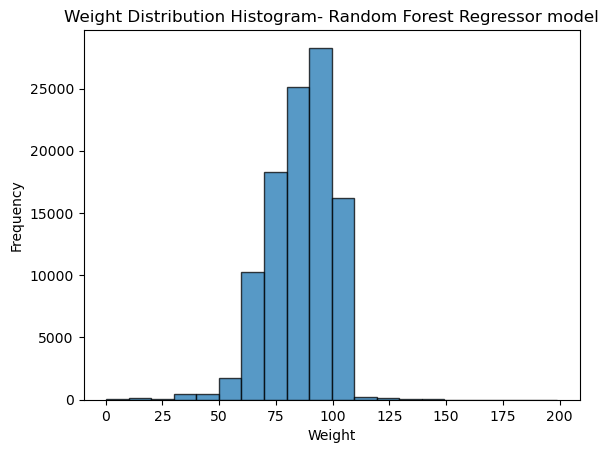

In [74]:
import matplotlib.pyplot as plt

# Plot histogram for the 'weight' column
plt.hist(df['weight'], bins=20, edgecolor='black', alpha=0.75)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution Histogram- Random Forest Regressor model')

# Show the plot
plt.show()

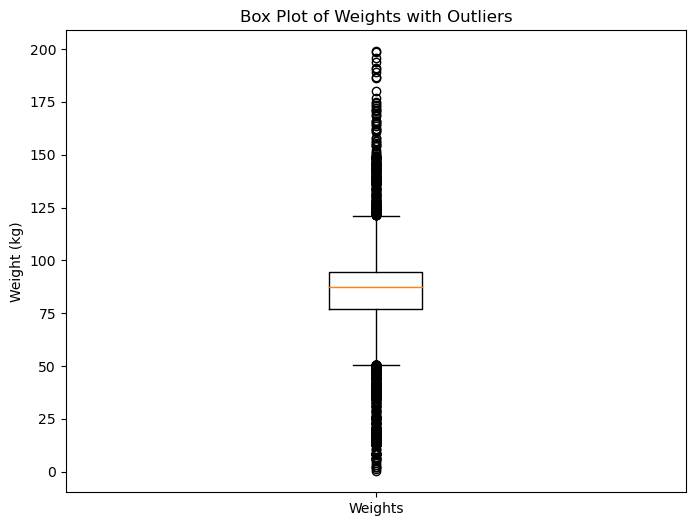

In [75]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['weight'], showfliers=True)
plt.title('Box Plot of Weights with Outliers')
plt.ylabel('Weight (kg)')
plt.xticks([1], ['Weights'])

plt.show()

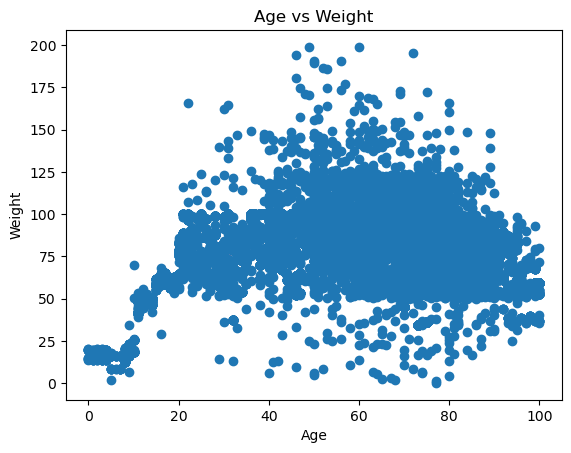

In [76]:
plt.scatter(df['age'], df['weight'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight')
plt.show()

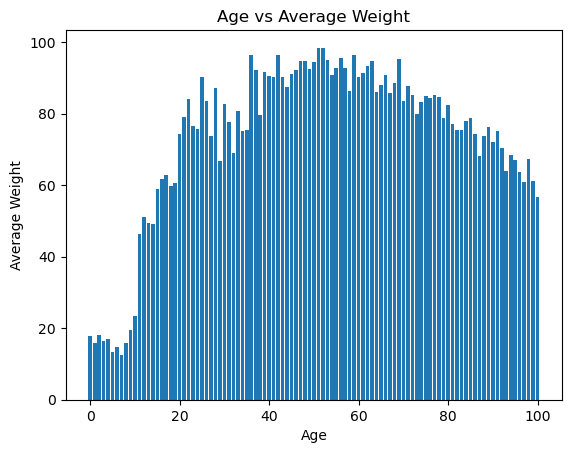

In [77]:
# Group the DataFrame by age and calculate the mean weight for each age group
age_weight = df.groupby('age')['weight'].mean().reset_index()

# Create the bar chart
plt.bar(age_weight['age'], age_weight['weight'])
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.title('Age vs Average Weight')
plt.show()

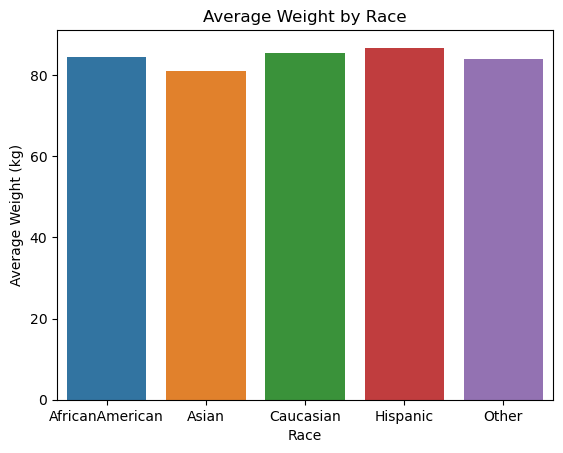

In [78]:
# Group the data by 'race' and calculate the mean weight for each race group
race_weight_data = df.groupby('race')['weight'].mean().reset_index()

# Create the bar plot
sns.barplot(x='race', y='weight', data=race_weight_data)
plt.title("Average Weight by Race")
plt.xlabel("Race")
plt.ylabel("Average Weight (kg)")

# Display the plot
plt.show()

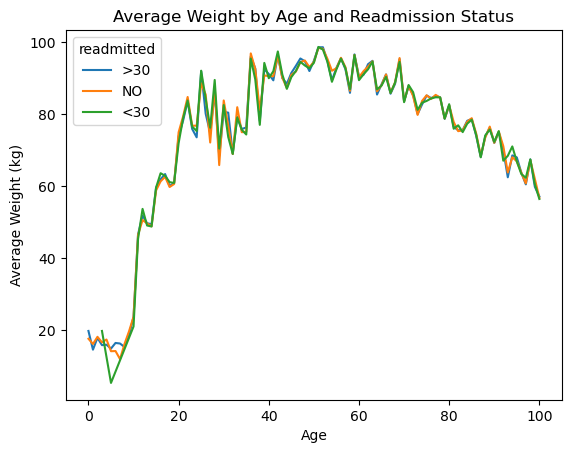

In [79]:
# Group the data by 'age' and 'readmitted' and calculate the mean weight for each group
age_readmitted_weight_data = df.groupby(['age', 'readmitted'])['weight'].mean().reset_index()

# Create the line plot
sns.lineplot(x='age', y='weight', hue='readmitted', data=age_readmitted_weight_data)
plt.title("Average Weight by Age and Readmission Status")
plt.xlabel("Age")
plt.ylabel("Average Weight (kg)")

# Display the plot
plt.show()

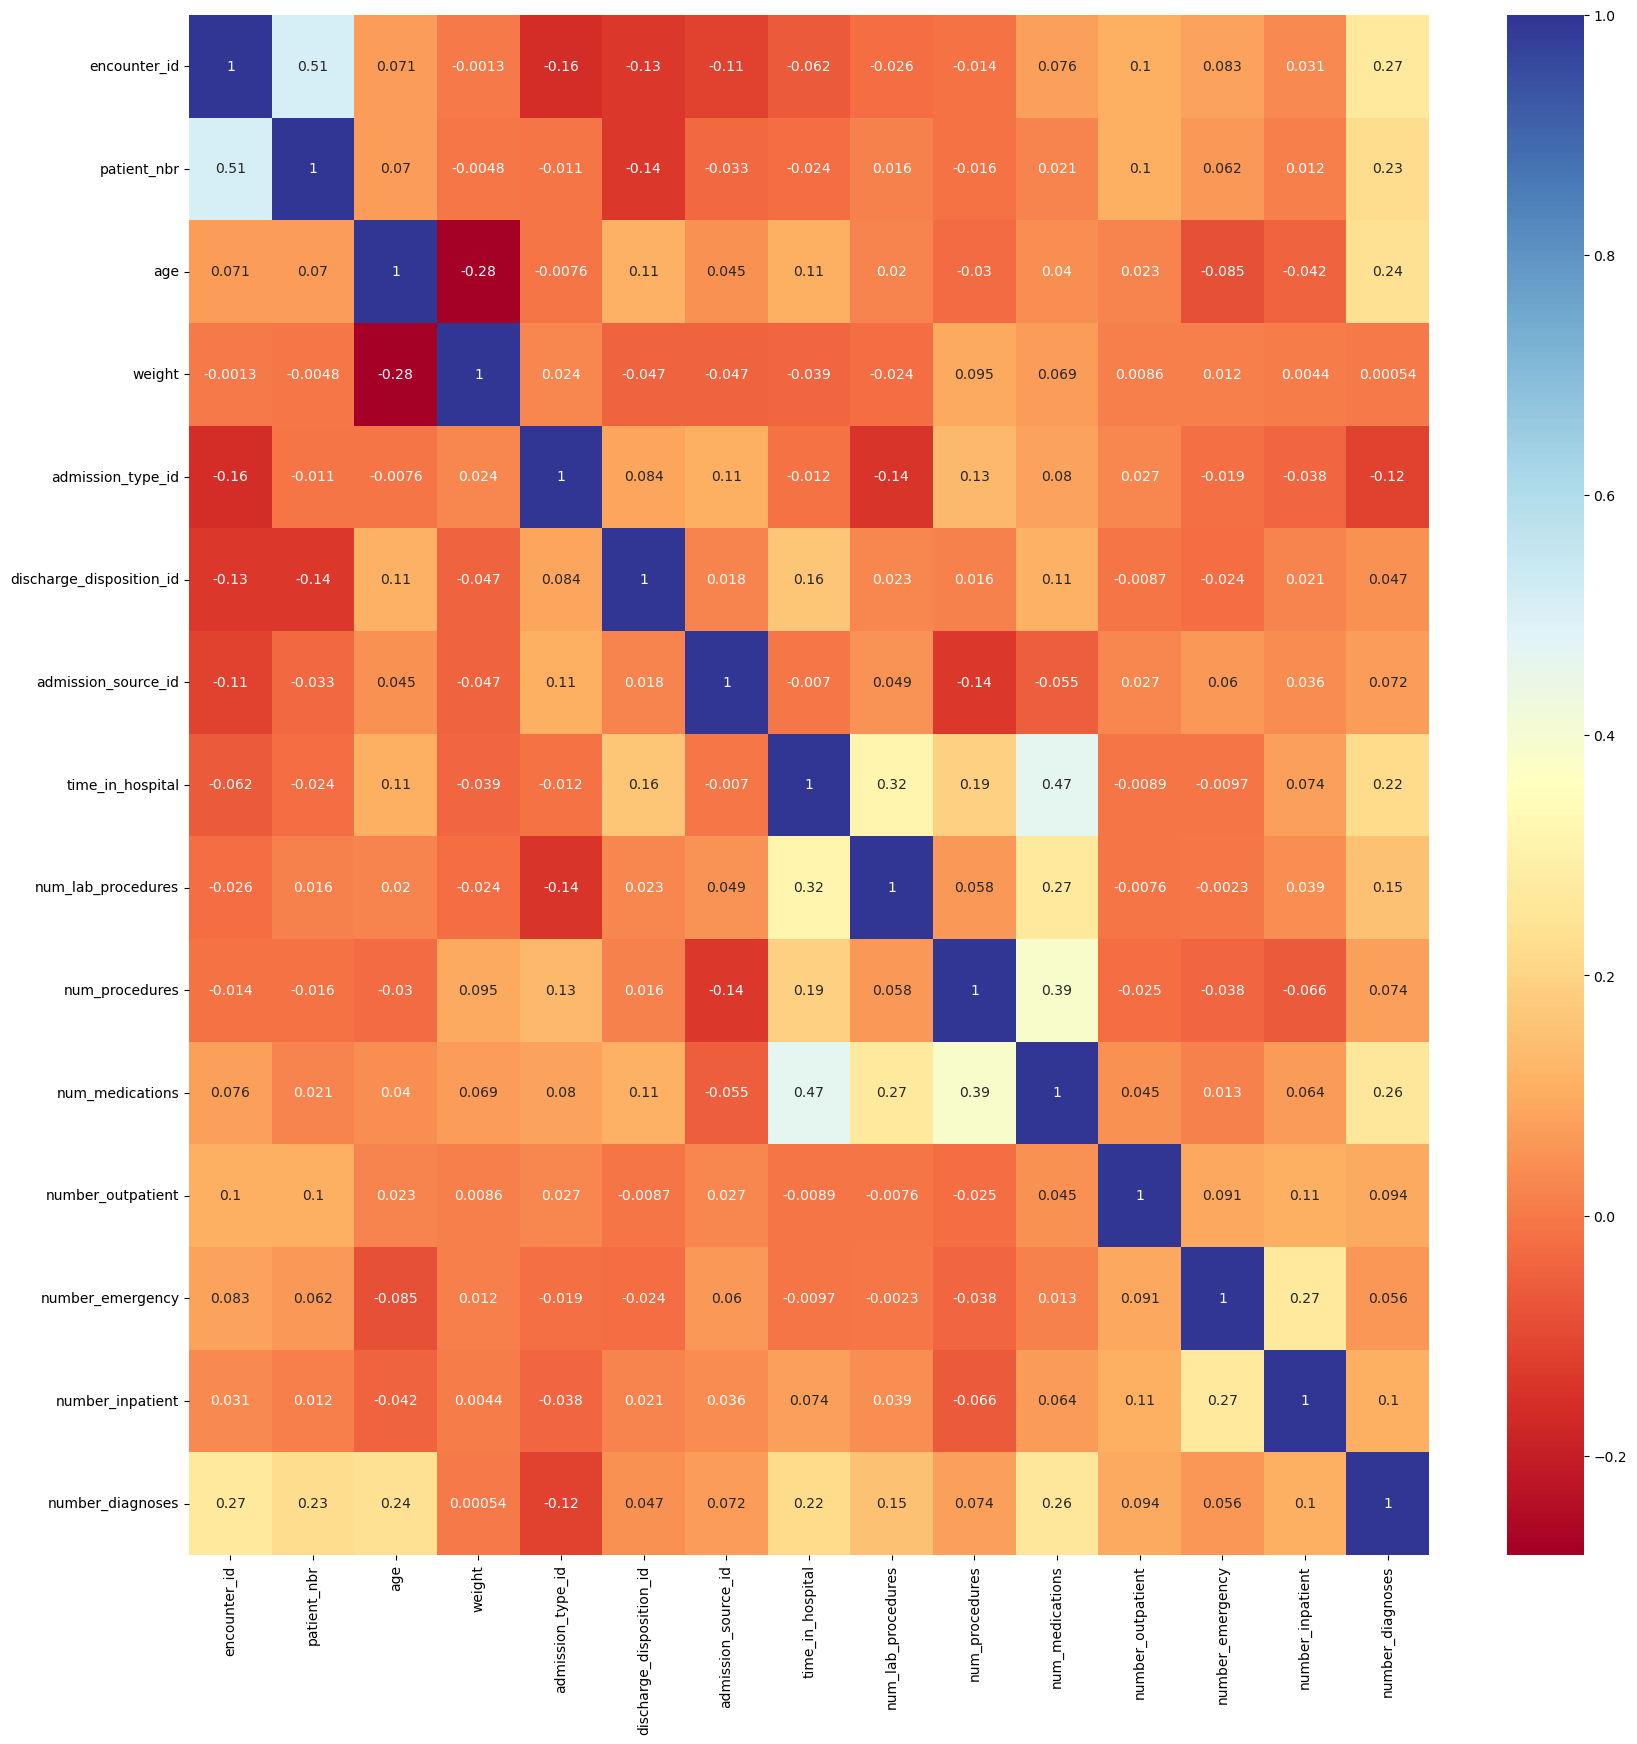

In [80]:
## Correlation

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")

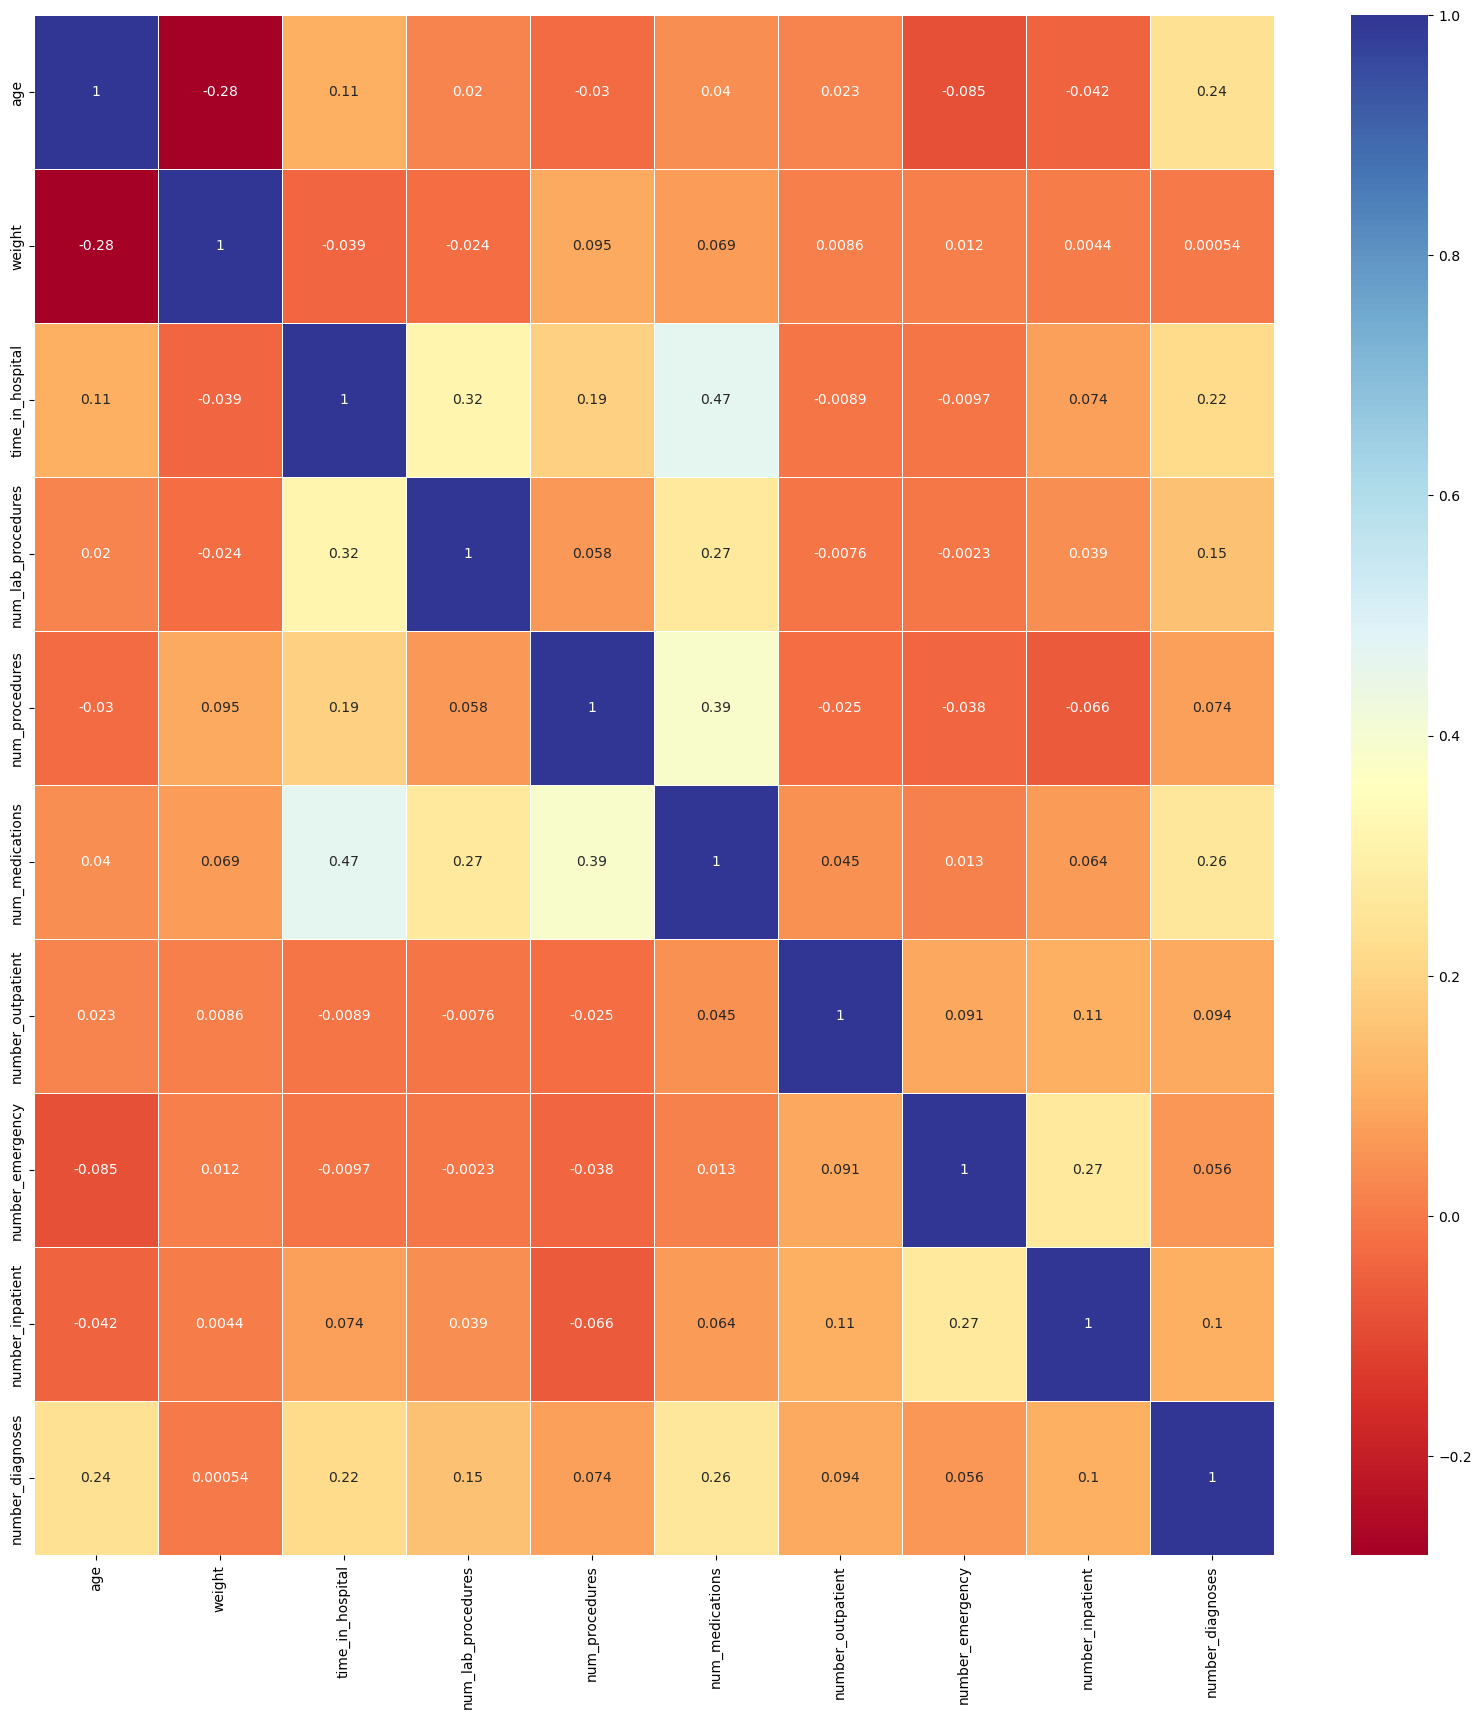

In [81]:
# Select the relevant columns
selected_columns = [
    'race', 'gender', 'age', 'weight', 'time_in_hospital',
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
    'diag_2', 'diag_3', 'number_diagnoses'
]
df_selected = df[selected_columns]

# Get correlations of each feature in the selected dataset
corrmat = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="RdYlBu", linewidths=.5)
plt.show()

In [136]:
# Set correlation thresholds
slightly_positive_threshold = 0.2
slightly_negative_threshold = -0.2

# Identify and print slightly positive and slightly negative correlations
print("Slightly positive correlations:")
for i in range(len(corrmat.columns)):
    for j in range(i+1, len(corrmat.columns)):
        if corrmat.iloc[i, j] >= slightly_positive_threshold:
            print(f"{corrmat.columns[i]} and {corrmat.columns[j]}: {corrmat.iloc[i, j]}")

print("\nSlightly negative correlations:")
for i in range(len(corrmat.columns)):
    for j in range(i+1, len(corrmat.columns)):
        if corrmat.iloc[i, j] <= slightly_negative_threshold:
            print(f"{corrmat.columns[i]} and {corrmat.columns[j]}: {corrmat.iloc[i, j]}")

print("\nWeak or no correlations:")
for i in range(len(corrmat.columns)):
    for j in range(i+1, len(corrmat.columns)):
        if abs(corrmat.iloc[i, j]) < slightly_positive_threshold and abs(corrmat.iloc[i, j]) > slightly_negative_threshold:
            print(f"{corrmat.columns[i]} and {corrmat.columns[j]}: {corrmat.iloc[i, j]}")

            

Slightly positive correlations:
age and number_diagnoses: 0.23778190736048496
time_in_hospital and num_lab_procedures: 0.31841062936978826
time_in_hospital and num_medications: 0.4661424616128584
time_in_hospital and number_diagnoses: 0.22013811240914802
num_lab_procedures and num_medications: 0.268183968032582
num_procedures and num_medications: 0.3857608919227324
num_medications and number_diagnoses: 0.26152406333295664
number_emergency and number_inpatient: 0.2665614031305278

Slightly negative correlations:
age and weight: -0.2825838203725394

Weak or no correlations:
age and time_in_hospital: 0.10591606090977684
age and num_lab_procedures: 0.020355596396603767
age and num_procedures: -0.030031506543442558
age and num_medications: 0.040407852334581676
age and number_outpatient: 0.022758683074157546
age and number_emergency: -0.08498536310732807
age and number_inpatient: -0.04227118076329123
weight and time_in_hospital: -0.038589365878267494
weight and num_lab_procedures: -0.0242154

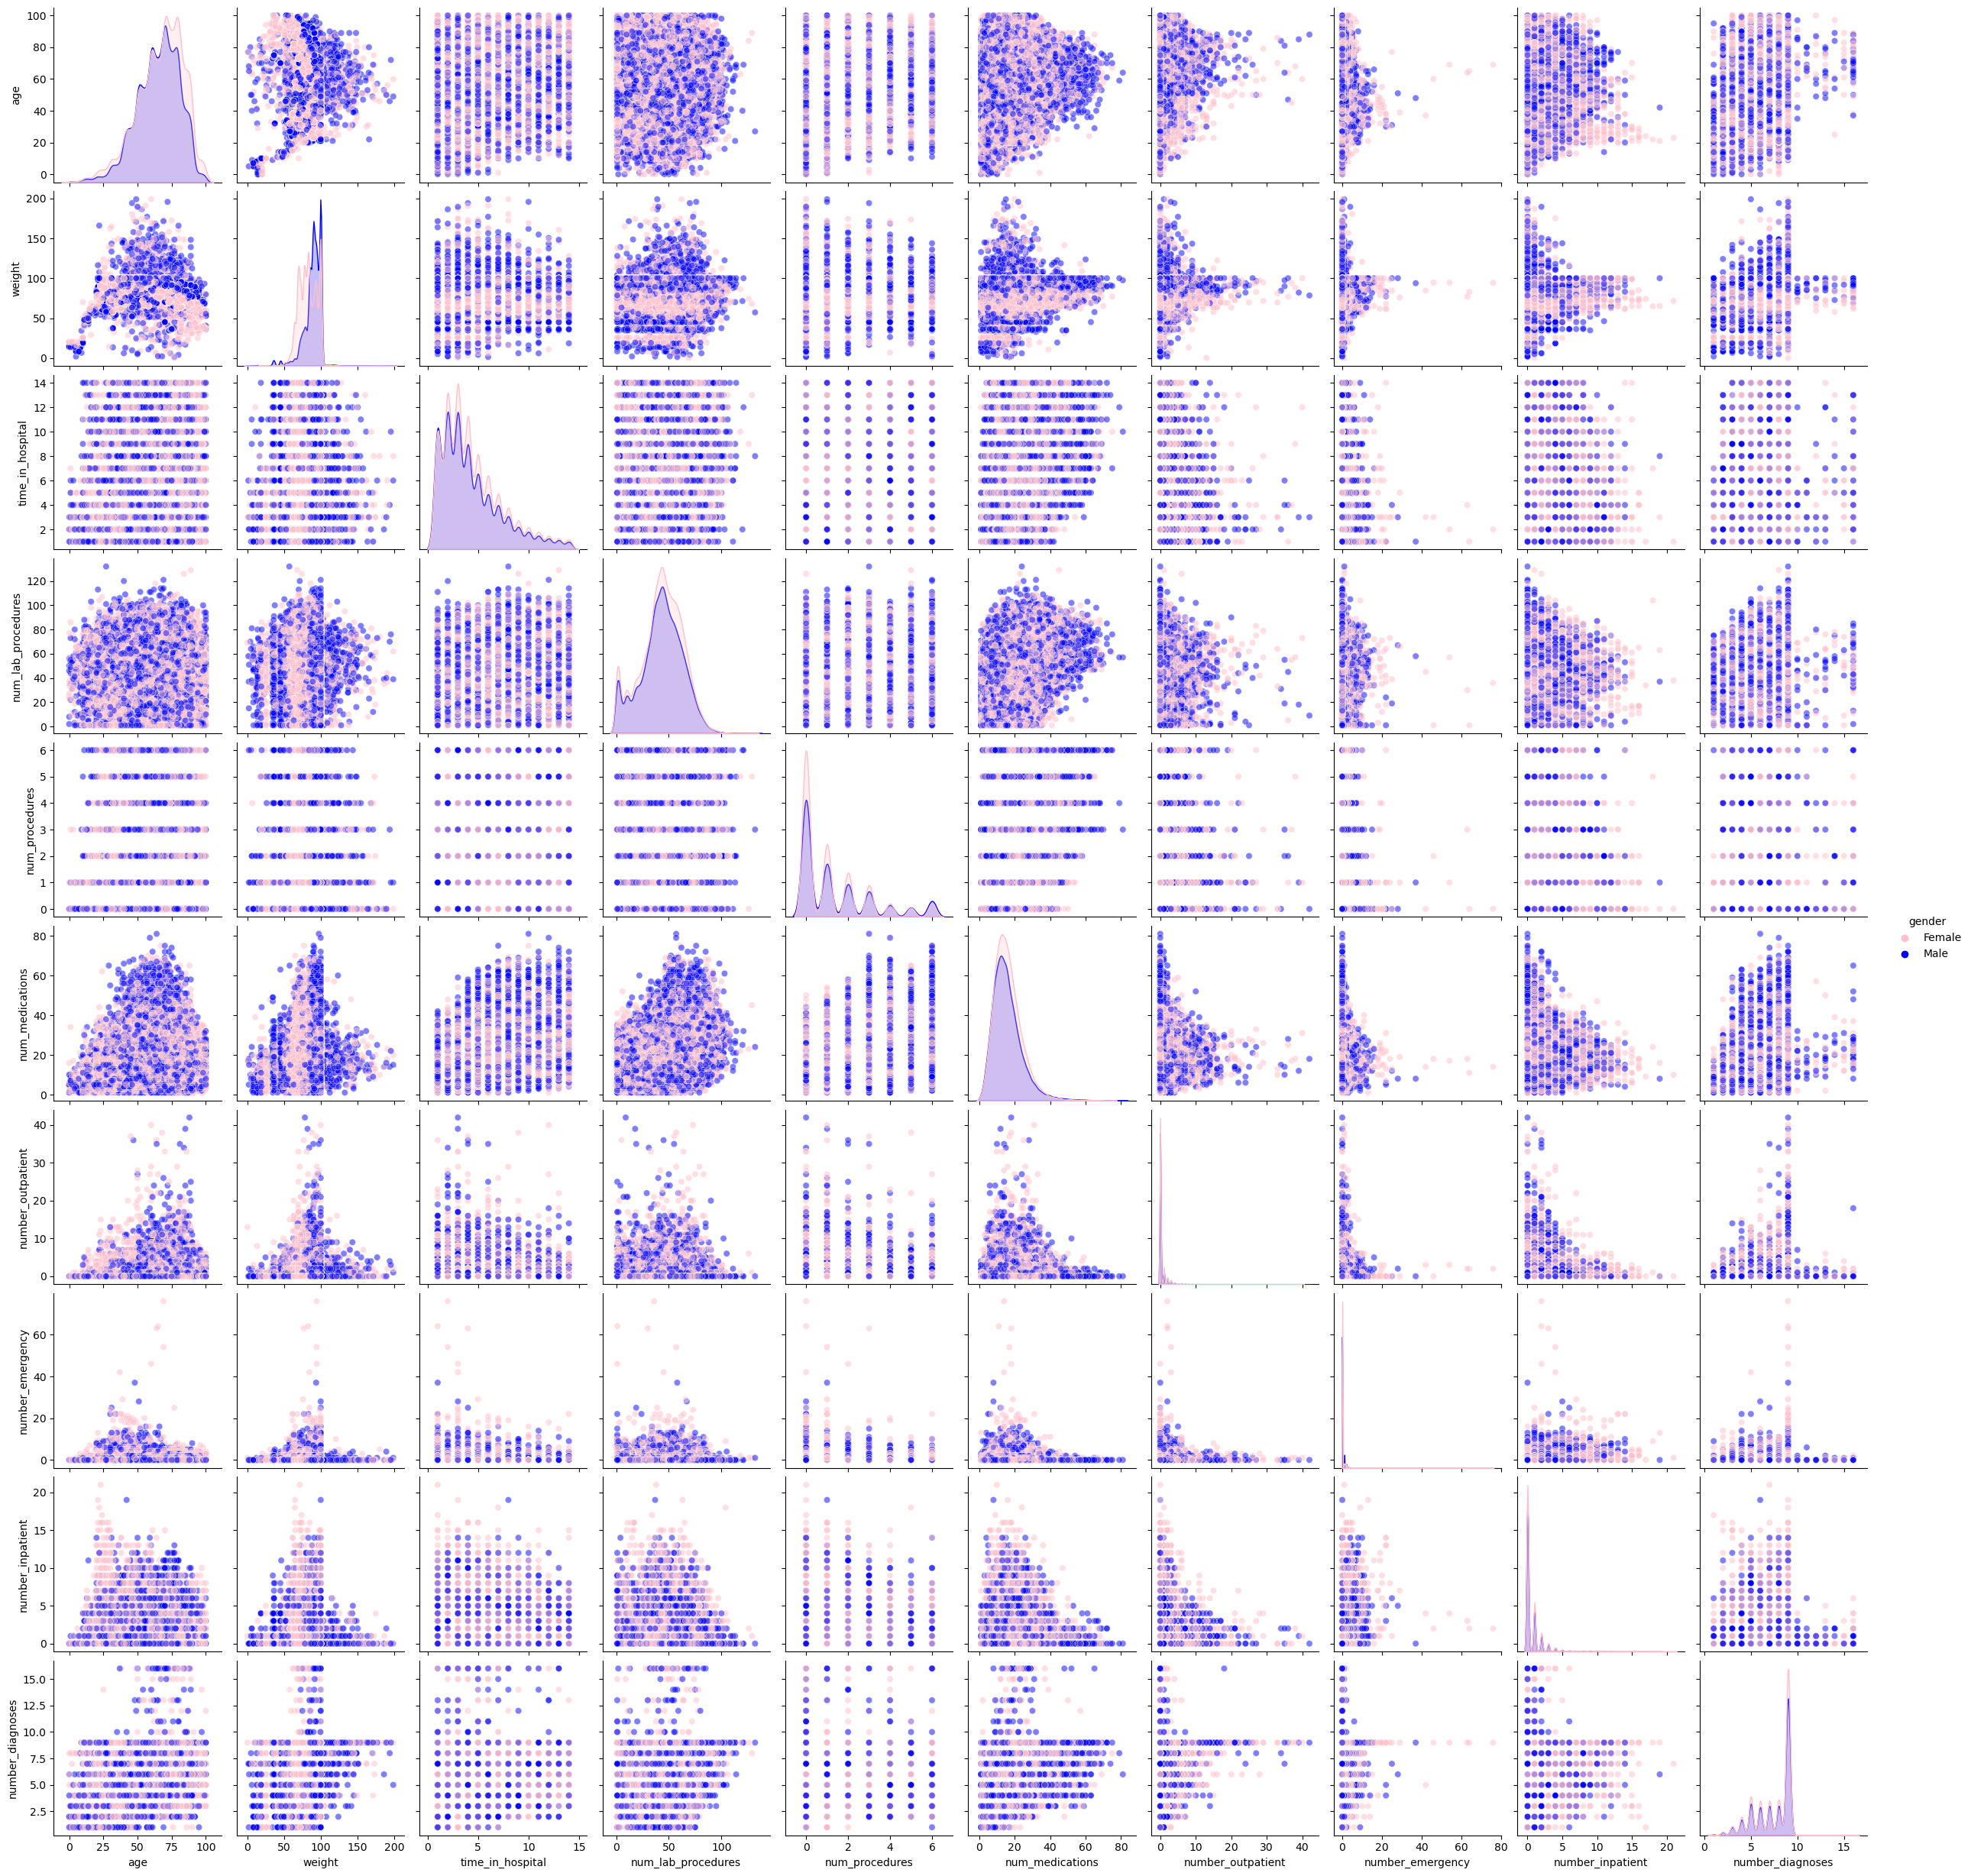

In [82]:
# Select the relevant columns
selected_columns = [
    'race', 'gender', 'age', 'weight', 'time_in_hospital',
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
    'diag_2', 'diag_3', 'number_diagnoses'
]
df_selected = df[selected_columns]

# Create a pair plot with 'gender' as the hue and specify the palette
sns.pairplot(df_selected, hue='gender', diag_kind='kde', plot_kws={'alpha': 0.5}, palette={"Female": "pink", "Male": "blue"})

# Display the plot
plt.show()

In [83]:
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
weight 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40254
medical_specialty 49944
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [84]:
# Change based on gender
#sns.pairplot(data, hue='gender', palette={'Female': 'red', 'Male': 'blue', 'Unknown/Invalid': 'green'})

In [85]:
df['readmitted'].value_counts()

NO     54861
>30    35542
<30    11357
Name: readmitted, dtype: int64

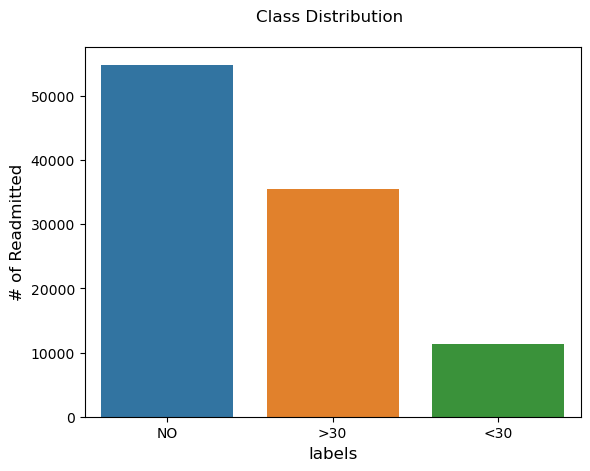

In [86]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

In [87]:
#Created Another label to map <30 and >30 to 1 class for better Analysis and Classification.
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [88]:
# Created another column and take it as 2 class problem, Label the <30 and >30 as YES and Other "N0" as No.

def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
df['readmitted_2'] =df['readmitted'].apply(check_label) 

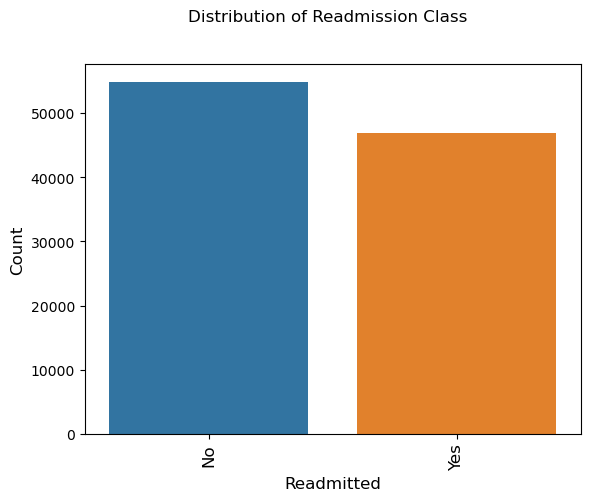

In [89]:
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()

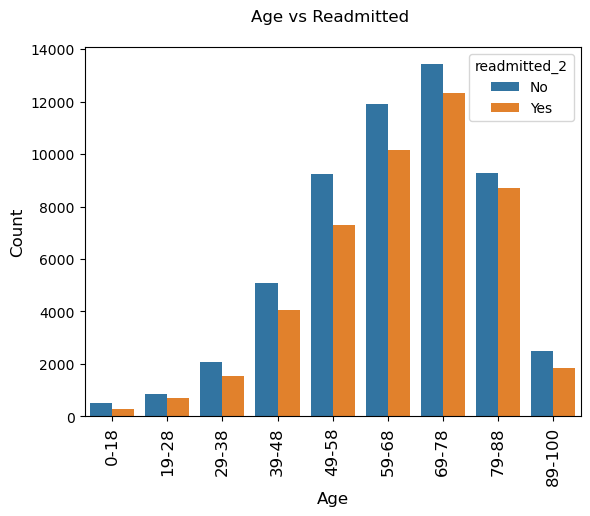

In [90]:
# Define age groups
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['0-18', '19-28', '29-38', '39-48', '49-58', '59-68', '69-78', '79-88', '89-100']

# Create age groups column without saving to dataframe
age_groups = pd.cut(df['age'], bins=bins, labels=labels)

# Plot countplot with age groups
ageax = sns.countplot(x=age_groups, hue="readmitted_2", data=df)
plt.xlabel('Age', size=12)
plt.xticks(rotation=90, size=12)
plt.ylabel('Count', size=12)
plt.title('Age vs Readmitted \n', size=12)
plt.show()

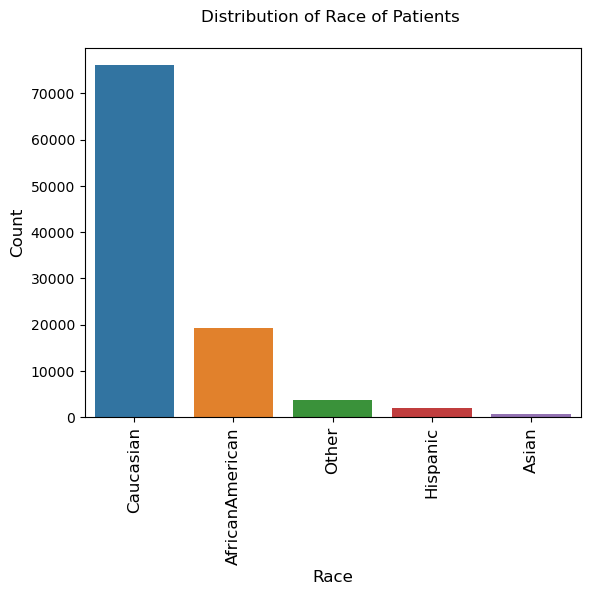

In [91]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

In [92]:
df.head()

encounter_id  patient_nbr             race  gender  age     weight  \
0       2278392      8222157        Caucasian  Female    5  16.361255   
1        149190     55629189        Caucasian  Female   15  61.785581   
2         64410     86047875  AfricanAmerican  Female   26  87.974930   
3        500364     82442376        Caucasian    Male   37  94.469988   
4         16680     42519267        Caucasian    Male   41  75.475755   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... insulin glyburide-metformin  glipizide-metformin  \
0                 1  ...      No                  No                   No   
1                 3  ...      Up                  No                   No   
2                 2  ...      No                  No                   No   
3                 2  ...      Up                  No                   No   
4                 1  ...  Steady                  No                   No   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   

   change  diabetesMed readmitted readmitted_2  
0      No           No         NO           No  
1      Ch          Yes        >30          Yes  
2      No          Yes         NO           No  
3      Ch          Yes         NO           No  
4      Ch          Yes         NO           No  

[5 rows x 51 columns]

In [93]:
df.drop(columns =['medical_specialty'], inplace = True)

In [94]:
df.drop(columns = ['acetohexamide', 'payer_code','tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

In [95]:
df.shape

(101760, 39)

In [96]:
df = df[~((df['diag_1'] == "?") | (df['diag_2'] == "?") | (df['diag_3'] == "?"))]

In [97]:
df.shape

(100238, 39)

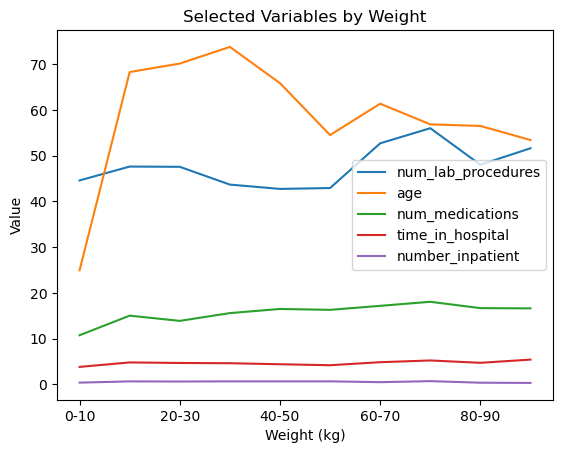

In [98]:
# Select variables to plot
df_selected = df[['num_lab_procedures', 'age', 'weight', 'num_medications', 'time_in_hospital', 'number_inpatient']]

# Group data by weight and calculate mean for each variable
bins = pd.cut(df_selected['weight'], bins=10, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
df_grouped = df_selected.groupby(bins).mean()

# Create line graph with all variables in relation to weight
df_grouped.plot(y=['num_lab_procedures', 'age', 'num_medications', 'time_in_hospital', 'number_inpatient'], kind='line')
plt.title('Selected Variables by Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Value')
plt.show()

# **Transform Categorical Features**

In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [100]:
categorical_features =['race', 'weight','gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed'] 

for i in categorical_features:
    df[i] = le.fit_transform(df[i])

In [101]:
df.head()

encounter_id  patient_nbr  race  gender  age  weight  admission_type_id  \
1        149190     55629189     2       0   15     687                  0   
2         64410     86047875     0       0   26    2239                  0   
3        500364     82442376     2       1   37    2711                  0   
4         16680     42519267     2       1   41    1354                  0   
5         35754     82637451     2       1   58    2624                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  ...  \
1                         0                    6                 3  ...   
2                         0                    6                 2  ...   
3                         0                    6                 2  ...   
4                         0                    6                 1  ...   
5                         0                    1                 3  ...   

   pioglitazone  rosiglitazone  acarbose  miglitol  insulin  \
1             1              1         1         1        3   
2             1              1         1         1        1   
3             1              1         1         1        3   
4             1              1         1         1        2   
5             1              1         1         1        2   

   glyburide-metformin  change  diabetesMed  readmitted  readmitted_2  
1                    1       0            1         >30           Yes  
2                    1       1            1          NO            No  
3                    1       0            1          NO            No  
4                    1       0            1          NO            No  
5                    1       1            1         >30           Yes  

[5 rows x 39 columns]

# **Split Train Test Data**

In [102]:
label = le.fit(df['readmitted_2'])

In [103]:
df['readmitted_2_encoded'] = label.transform(df['readmitted_2'])  #After Label Encoding the values assigned to class values are O:No Yes:1

In [104]:
df= df.drop(columns= ['encounter_id', 'patient_nbr', 'readmitted','readmitted_2']) #Feature  to drop

In [105]:
df

race  gender  age  weight  admission_type_id  \
1          2       0   15     687                  0   
2          0       0   26    2239                  0   
3          2       1   37    2711                  0   
4          2       1   41    1354                  0   
5          2       1   58    2624                  1   
...      ...     ...  ...     ...                ...   
101755     0       1   80    2125                  0   
101756     0       0   81    1415                  0   
101757     2       1   79    2224                  0   
101758     2       0   83    1193                  1   
101759     2       1   75    2478                  0   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              0                    6                 3   
2                              0                    6                 2   
3                              0                    6                 2   
4                              0                    6                 1   
5                              0                    1                 3   
...                          ...                  ...               ...   
101755                         2                    6                 3   
101756                         3                    4                 5   
101757                         0                    6                 1   
101758                         2                    6                10   
101759                         0                    6                 6   

        num_lab_procedures  num_procedures  ...  glyburide  pioglitazone  \
1                       59               0  ...          1             1   
2                       11               5  ...          1             1   
3                       44               1  ...          1             1   
4                       51               0  ...          1             1   
5                       31               6  ...          1             1   
...                    ...             ...  ...        ...           ...   
101755                  51               0  ...          1             1   
101756                  33               3  ...          1             1   
101757                  53               0  ...          1             1   
101758                  45               2  ...          1             2   
101759                  13               3  ...          1             1   

        rosiglitazone  acarbose  miglitol  insulin  glyburide-metformin  \
1                   1         1         1        3                    1   
2                   1         1         1        1                    1   
3                   1         1         1        3                    1   
4                   1         1         1        2                    1   
5                   1         1         1        2                    1   
...               ...       ...       ...      ...                  ...   
101755              1         1         1        0                    1   
101756              1         1         1        2                    1   
101757              1         1         1        0                    1   
101758              1         1         1        3                    1   
101759              1         1         1        1                    1   

        change  diabetesMed  readmitted_2_encoded  
1            0            1                     1  
2            1            1                     0  
3            0            1                     0  
4            0            1                     0  
5            1            1                     1  
...        ...          ...                   ...  
101755       0            1                     1  
101756       1            1                     0  
101757       0            1                     0  
101758       0            1                     0  
101759       1            0                     

In [106]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted_2_encoded'],
      dtype='object')

In [107]:
#Split dependent and independant parameters 
X = df.drop(columns= ['readmitted_2_encoded'])
Y = df['readmitted_2_encoded']

In [108]:
# Feature scaling
from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(X)

In [109]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=42)

In [110]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80190, 35), (20048, 35), (80190,), (20048,))

# RandomForestClassifier

In [111]:
# Train the random forest classifier model
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [112]:
# Predict the test set results
y_pred = classifier.predict(X_test)

race: 0.019301318249668478
gender: 0.014957336422327711
age: 0.08051543132837954
weight: 0.0766089533271701
admission_type_id: 0.023148143847859768
discharge_disposition_id: 0.04103846865199749
admission_source_id: 0.019774564642583925
time_in_hospital: 0.051981974224485465
num_lab_procedures: 0.08457142921200655
num_procedures: 0.03426745300454007
num_medications: 0.07316155165434703
number_outpatient: 0.016822716884823903
number_emergency: 0.014612534397994708
number_inpatient: 0.04944152735484966
diag_1: 0.08042568193997161
diag_2: 0.07943180269874167
diag_3: 0.07760231597591012
number_diagnoses: 0.035107591303907844
max_glu_serum: 0.005623410981840759
A1Cresult: 0.017012025029731467
metformin: 0.01279032638675606
repaglinide: 0.002608798983493534
nateglinide: 0.0014703942779843086
chlorpropamide: 0.00025016466424550526
glimepiride: 0.006720782659521292
glipizide: 0.011372731798310982
glyburide: 0.010570517210649864
pioglitazone: 0.007782128149166875
rosiglitazone: 0.007130083794278

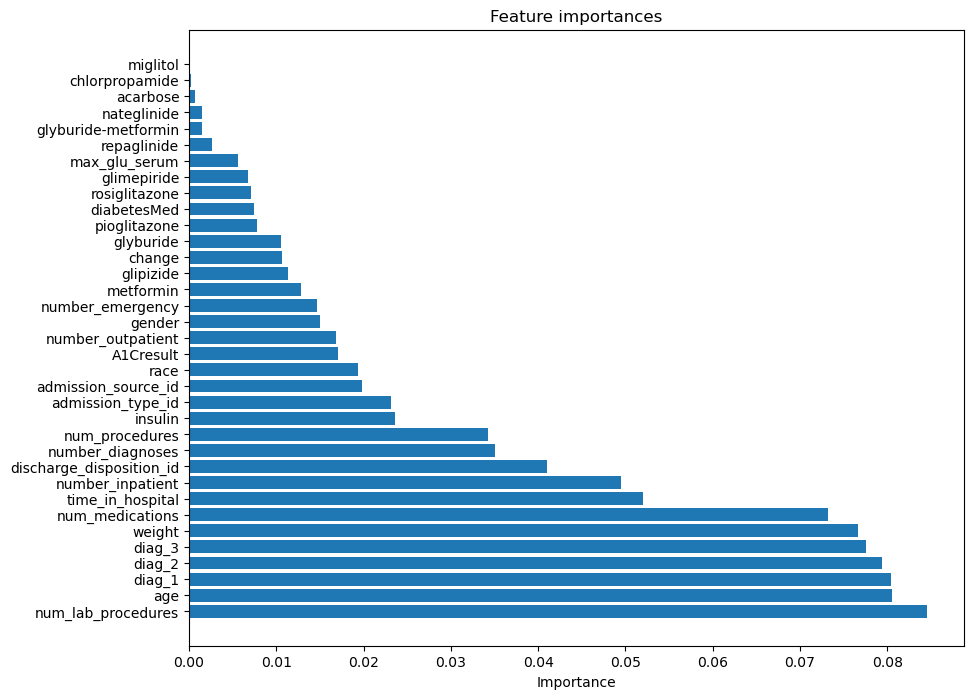

In [137]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define features and target
X = df.drop('readmitted_2_encoded', axis=1) # features
y = df['readmitted_2_encoded'] # target

# Initialize random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the data
rfc.fit(X, y)

# Get feature importances from the model
importances = rfc.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

# Create a barplot to visualize feature importances with variable attribute on y-axis
features = X.columns
indices = np.argsort(importances)[::-1] # sort features by importance
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices]) # horizontal bar plot
plt.yticks(range(X.shape[1]), features[indices]) # set y-axis tick labels
plt.xlabel('Importance') # set x-axis label
plt.show()

# **Model performance**

In [114]:
# Evaluate the model performance
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[7992 2812]
 [4477 4767]]
0.6364225857940942


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=450, random_state=43)

In [116]:
rf_prediction =  rf.predict(X_test)

In [117]:
print(classification_report(y_test, rf_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.63      0.77      0.70     10804
    Readmitted       0.64      0.48      0.55      9244

      accuracy                           0.64     20048
     macro avg       0.64      0.63      0.62     20048
  weighted avg       0.64      0.64      0.63     20048



In [118]:
# Import required libraries
import os
cwd = os.getcwd()
print(cwd)
import numpy as np
import joblib
import pandas as pd

# Train model
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X, y)

# Save model
joblib.dump(model, 'random_forest_model.pkl')

# Load the trained model and scaler
model = joblib.load('random_forest_model.pkl')

# Select a random sample of rows from the data
sample_size = 10
sample = df.sample(n=sample_size)

# Make predictions on the input data
predictions = model.predict(X)

# Print the predictions
for i, prediction in enumerate(predictions):
    if prediction == 0:
        print('Sample {}: The patient with diabetes will not be readmitted.'.format(i+1))
    else:
        print('Sample {}: The patient with diabetes will be readmitted.'.format(i+1))

/Users/keril/Diabetes-130-US-hospitals-for-years-1999-2008-Data-Set


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Sample 94747: The patient with diabetes will not be readmitted.
Sample 94748: The patient with diabetes will not be readmitted.
Sample 94749: The patient with diabetes will not be readmitted.
Sample 94750: The patient with diabetes will not be readmitted.
Sample 94751: The patient with diabetes will not be readmitted.
Sample 94752: The patient with diabetes will not be readmitted.
Sample 94753: The patient with diabetes will not be readmitted.
Sample 94754: The patient with diabetes will be readmitted.
Sample 94755: The patient with diabetes will be readmitted.
Sample 94756: The patient with diabetes will not be readmitted.
Sample 94757: The patient with diabetes will not be readmitted.
Sample 94758: The patient with diabetes will be readmitted.
Sample 94759: The patient with diabetes will not be readmitted.
Sample 94760: The patient with diabetes will not be readmitted.
Sample 94761: The patient with diabetes will not be readmitted.
Sample 94762: The patient with diabetes will not be

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score


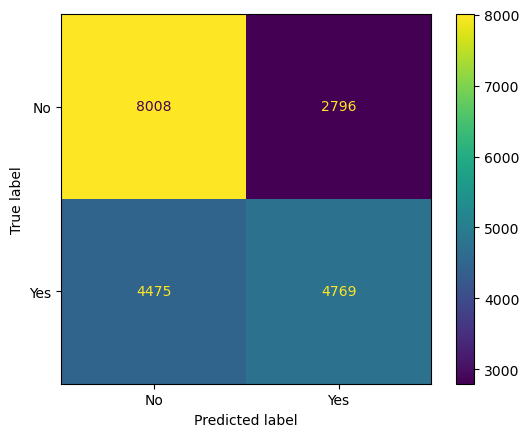

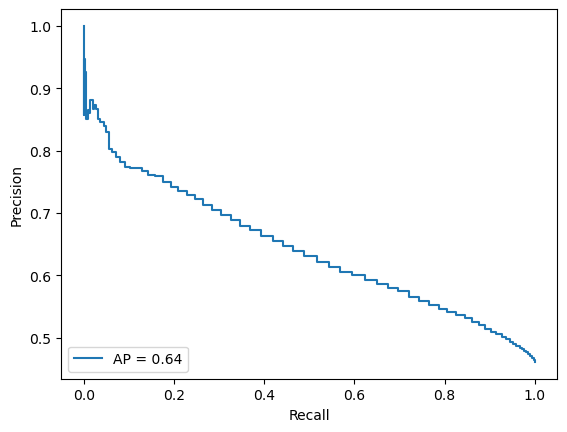

In [120]:
# Initialize random forest classifier
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rfc.predict(X_test)

# Predict the class probabilities on the test data
y_prob = rfc.predict_proba(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
class_names = ['No', 'Yes']
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp_cm.plot()

# Plot precision-recall curve using PrecisionRecallDisplay
prec, rec, _ = precision_recall_curve(y_test, y_prob[:, 1])
disp_pr = PrecisionRecallDisplay(precision=prec, recall=rec, average_precision=average_precision_score(y_test, y_prob[:, 1]))
disp_pr.plot()

plt.show()

# Logistic Regression & Classifier

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [122]:
#Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [123]:
#Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [124]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.6174181963288109
Confusion Matrix:
 [[8693 2111]
 [5559 3685]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69     10804
           1       0.64      0.40      0.49      9244

    accuracy                           0.62     20048
   macro avg       0.62      0.60      0.59     20048
weighted avg       0.62      0.62      0.60     20048



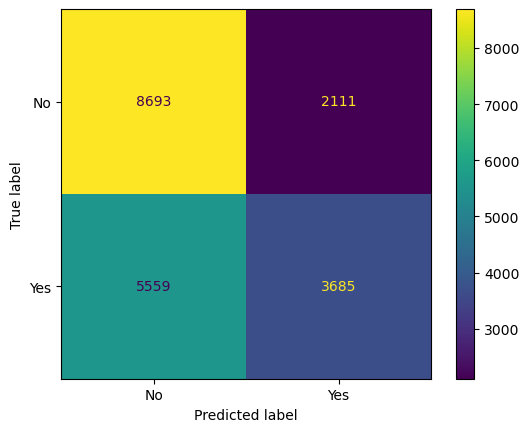

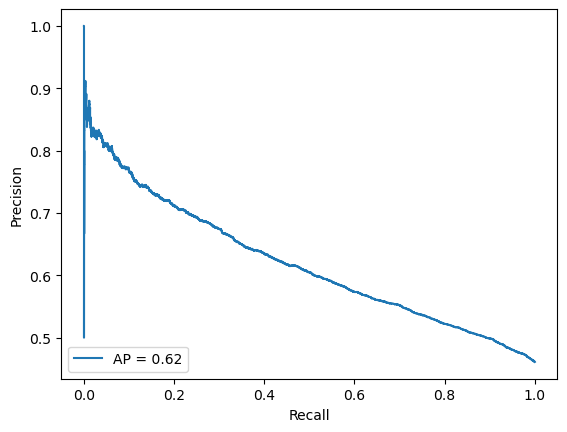

In [125]:

# Initialize logistic regression classifier
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

# Predict the class probabilities on the test data
y_prob = lr.predict_proba(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
class_names = ['No', 'Yes']
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp_cm.plot()

# Plot precision-recall curve using PrecisionRecallDisplay
prec, rec, _ = precision_recall_curve(y_test, y_prob[:, 1])
disp_pr = PrecisionRecallDisplay(precision=prec, recall=rec, average_precision=average_precision_score(y_test, y_prob[:, 1]))
disp_pr.plot()

plt.show()

# XGBoost Classifier

In [126]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [127]:
# Instantiate the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


/Users/keril/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [128]:
# Fit the XGBoost model to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [129]:
# Predict the class labels for the test set
y_pred = xgb_clf.predict(X_test)

In [130]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.6433559457302475
Confusion Matrix:
 [[7749 3055]
 [4095 5149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.68     10804
           1       0.63      0.56      0.59      9244

    accuracy                           0.64     20048
   macro avg       0.64      0.64      0.64     20048
weighted avg       0.64      0.64      0.64     20048



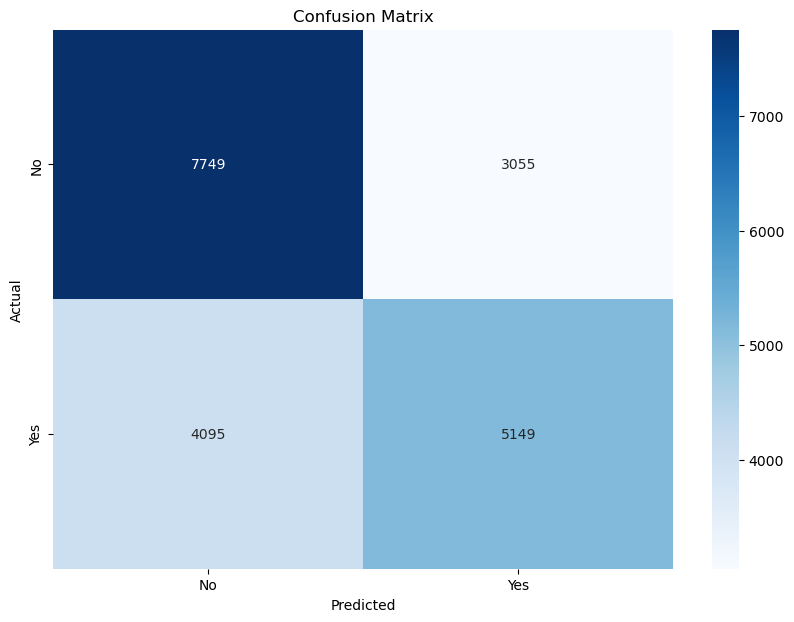

In [131]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hypertuning

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the model to be tuned
model = RandomForestClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy Score:", grid_search.best_score_)

# Evaluate the model on the testing set using the best hyperparameters
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy Score: 0.6413393191170969
              precision    recall  f1-score   support

           0       0.64      0.76      0.70     10804
           1       0.64      0.51      0.57      9244

    accuracy                           0.64     20048
   macro avg       0.64      0.63      0.63     20048
weighted avg       0.64      0.64      0.64     20048

